In [2]:
%load_ext autoreload
%autoreload 2
import time
import os
from rdkit import Chem
import seaborn as sns
import numpy as np
import pandas as pd
import sys
from tqdm import tqdm
from mimas.tools.spectral_file.extract_ms1_feature import process_mzml_file, extract_ms2_spectra, find_features
import logging
from toolsets.spectra_operations import entropy_similarity_default
from toolsets.std_list_prep import complete_adducts, complete_formula
# from toolsets.API_gets import complete_smiles
from toolsets.search import string_search, num_search
import toolsets.spectra_operations as so
from tqdm import tqdm
# from toolsets.features_by_alphapept import find_features_alphapept
# std_list_path= "/Users/fanzhoukong/Documents/GitHub/Libgen_data/GT"
source_dir = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/UVPD"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [595]:
from toolsets.API_gets import GNPS_get, pubchem_get
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
def get_smiles_from_db(std_list, inchikey_column = 'inchikey'):
    smiles = []
    for index, row in tqdm(std_list.iterrows(), total=len(std_list)):
        try:
            smiles.append(pubchem_get(content= row[inchikey_column]))
        except:
            smiles.append(np.NAN)
    std_list['smiles_fetched']=smiles
    formal_charges = []
    formula_fetched=[]
    for index, row in std_list.iterrows():
        mol = Chem.MolFromSmiles(row['smiles_fetched'])
        formula_fetched.append(CalcMolFormula(mol))
        formal_charges.append(Chem.GetFormalCharge(mol))

    std_list['formal_charges']=formal_charges
    std_list['formula_fetched']=formula_fetched
    return (std_list)

# preparing std_list for EAD library

In [3]:
source_dir = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/EAD"

In [599]:

std_list_pfp = pd.read_csv(os.path.join(source_dir, "PFP_pos_mixlist.csv"))
std_list_hilic = pd.read_csv(os.path.join(source_dir, "HILIC_pos_mixlist.csv"))
for list in [std_list_pfp, std_list_hilic]:
    list = get_smiles_from_db(list)

100%|██████████| 1474/1474 [21:19<00:00,  1.15it/s] 


In [5]:
std_list_pfp_crude = pd.read_csv(os.path.join(source_dir, "PFP_std_list_crude.csv"))

In [9]:
std_list_pfp_salt = std_list_pfp_crude.query('formula_fetched != uncharged_formula')

In [42]:
std_list_pfp_salt

,name,inchikey,mix,smiles_fetched,formal_charges,formula_fetched,stripped_smiles,stripped_formula,stripped_formal_charges,uncharged_smiles,uncharged_formula,uncharged_formal_charges,uncharged_inchikey,monoisotopic_mass
409,Carnitine (Dl) Hydrochloride,JXXCENBLGFBQJM-UHFFFAOYSA-N,PFPpos_P N 1_EAD,C[N+](C)(C)CC(CC(=O)O)O.[Cl-],0,C7H16ClNO3,C[N+](C)(C)CC(O)CC(=O)O,C7H16NO3+,1,C[N+](C)(C)CC(O)CC(=O)O,C7H16NO3+,1,PHIQHXFUZVPYII-UHFFFAOYSA-O,162.112470
419,MONENSIN SODIUM,XOIQMTLWECTKJL-PDHYURILSA-M,PFPpos_P N 1_EAD,CCC1(CCC(O1)C2(CCC3(O2)CC(C(C(O3)C(C)C(C(C)C(=...,0,C36H61NaO11,CCC1(C2OC(C3OC(O)(CO)C(C)CC3C)CC2C)CCC(C2(C)CC...,C36H61O11-,-1,CCC1(C2OC(C3OC(O)(CO)C(C)CC3C)CC2C)CCC(C2(C)CC...,C36H62O11,0,GAOZTHIDHYLHMS-UHFFFAOYSA-N,670.429213
422,PUTRESCINE DIHYDROCHLORIDE,XXWCODXIQWIHQN-UHFFFAOYSA-N,PFPpos_P N 1_EAD,C(CCN)CN.Cl.Cl,0,C4H14Cl2N2,NCCCCN,C4H12N2,0,NCCCCN,C4H12N2,0,KIDHWZJUCRJVML-UHFFFAOYSA-N,88.100048
494,NALOXONE HYDROCHLORIDE,RGPDIGOSVORSAK-STHHAXOLSA-N,PFPpos_P N 3_EAD,C=CCN1CCC23C4C(=O)CCC2(C1CC5=C3C(=C(C=C5)O)O4)...,0,C19H22ClNO4,C=CCN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3(O)C1C5,C19H21NO4,0,C=CCN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3(O)C1C5,C19H21NO4,0,UZHSEJADLWPNLE-UHFFFAOYSA-N,327.147058
496,Sodium Tetradecyl Sulfate,UPUIQOIQVMNQAP-UHFFFAOYSA-M,PFPpos_P N 3_EAD,CCCCCCCCCCCCCCOS(=O)(=O)[O-].[Na+],0,C14H29NaO4S,CCCCCCCCCCCCCCOS(=O)(=O)[O-],C14H29O4S-,-1,CCCCCCCCCCCCCCOS(=O)(=O)O,C14H30O4S,0,URLJMZWTXZTZRR-UHFFFAOYSA-N,294.186480
559,CHOLINE CHLORIDE,SGMZJAMFUVOLNK-UHFFFAOYSA-M,PFPpos_P N 5_EAD,C[N+](C)(C)CCO.[Cl-],0,C5H14ClNO,C[N+](C)(C)CCO,C5H14NO+,1,C[N+](C)(C)CCO,C5H14NO+,1,OEYIOHPDSNJKLS-UHFFFAOYSA-N,104.106990
586,Anabasine Hydrochloride,VTMZQNZVYCJLGG-UHFFFAOYSA-N,PFPpos_P N 6_EAD,C1CCNC(C1)C2=CN=CC=C2.Cl,0,C10H15ClN2,c1cncc(C2CCCCN2)c1,C10H14N2,0,c1cncc(C2CCCCN2)c1,C10H14N2,0,MTXSIJUGVMTTMU-UHFFFAOYSA-N,162.115698
642,Uridine Triphosphate Trisodium,MMJGIWFJVDOPJF-LLWADOMFSA-K,PFPpos_P N 7_EAD,C1=CN(C(=O)NC1=O)C2C(C(C(O2)COP(=O)([O-])OP(=O...,0,C9H12N2Na3O15P3,O=c1ccn(C2OC(COP(=O)([O-])OP(=O)([O-])OP(=O)([...,C9H12N2O15P3-3,-3,O=c1ccn(C2OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O...,C9H15N2O15P3,0,PGAVKCOVUIYSFO-UHFFFAOYSA-N,483.968528
672,HISTAMINE DIHYDROCHLORIDE,PPZMYIBUHIPZOS-UHFFFAOYSA-N,PFPpos_P N 8_EAD,C1=C(NC=N1)CCN.Cl.Cl,0,C5H11Cl2N3,NCCc1cnc[nH]1,C5H9N3,0,NCCc1cnc[nH]1,C5H9N3,0,NTYJJOPFIAHURM-UHFFFAOYSA-N,111.079647
744,Kasugamycin Hydrochloride,ZDRBJJNXJOSCLR-YZKQBBCCSA-N,PFPpos_P N 10_EAD,CC1C(CC(C(O1)OC2C(C(C(C(C2O)O)O)O)O)N)N=C(C(=O...,0,C14H26ClN3O9,CC1OC(OC2C(O)C(O)C(O)C(O)C2O)C(N)CC1N=C(N)C(=O)O,C14H25N3O9,0,CC1OC(OC2C(O)C(O)C(O)C(O)C2O)C(N)CC1N=C(N)C(=O)O,C14H25N3O9,0,PVTHJAPFENJVNC-UHFFFAOYSA-N,379.159079


In [40]:
mol = Chem.MolFromSmiles(std_list_pfp_salt.iloc[6]['uncharged_smiles'])
# substructure = Chem.MolFromSmarts('[HCl]')
# print(mol.GetSubstructMatches(substructure))
# mol
im = Chem.Draw.MolToImage(mol)
im.save(os.path.join(source_dir, 'test_uncharged.png'))

In [34]:
from rdkit.Chem.Draw import rdMolDraw2D

In [37]:
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
hit_ats=list(mol.GetSubstructMatch(substructure))
test =rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)

In [39]:
test

In [600]:
from toolsets.adduct_calculator import neutrilize_salt_df
for list in [std_list_pfp, std_list_hilic]:
    list = neutrilize_salt_df(list, '[Na+,K+,Cl-,HCl]')

[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Running Uncharger
[21:01:04] Run

In [1]:
monoisotopic_mass = []
for index, row in std_list_pfp.iterrows():
    mol_ = check_mol(row['uncharged_smiles'])
    monoisotopic_mass.append(ExactMolWt(mol_))
std_list_pfp['monoisotopic_mass']=monoisotopic_mass
monoisotopic_mass = []
for index, row in std_list_hilic.iterrows():
    mol_ = check_mol(row['uncharged_smiles'])
    monoisotopic_mass.append(ExactMolWt(mol_))
std_list_hilic['monoisotopic_mass']=monoisotopic_mass

NameError: name 'std_list_hilic' is not defined

In [14]:
std_list_pfp.to_csv(os.path.join(source_dir, "PFP_std_list_crude.csv"), index = False)
std_list_hilic.to_csv(os.path.join(source_dir, "HILIC_std_list_crude.csv"), index = False)

In [9]:
std_list_pfp.columns

Index(['name', 'inchikey', 'mix', 'smiles_fetched', 'formal_charges',
       'formula_fetched', 'stripped_smiles', 'stripped_formula',
       'stripped_formal_charges', 'uncharged_smiles', 'uncharged_formula',
       'uncharged_formal_charges', 'uncharged_inchikey'],
      dtype='object')

In [7]:
from rdkit.Chem.Descriptors import ExactMolWt
from toolsets.std_list_prep import check_mol

In [592]:
string_search(std_list_pfp, 'formal_charges', 0, reverse=True)

,name,inchikey,Mix label,smiles_fetched,formal_charges,stripped_smiles,stripped_formulas,stripped_formal_charges,uncharged_smiles,uncharged_formulas,uncharged_formal_charges
557,CHOLINE,OEYIOHPDSNJKLS-UHFFFAOYSA-N,PFPpos_P N 5_EAD,C[N+](C)(C)CCO,1,C[N+](C)(C)CCO,C5H14NO+,1,C[N+](C)(C)CCO,C5H14NO+,1
558,CHOLINE Cation,OEYIOHPDSNJKLS-UHFFFAOYSA-N,PFPpos_P N 5_EAD,C[N+](C)(C)CCO,1,C[N+](C)(C)CCO,C5H14NO+,1,C[N+](C)(C)CCO,C5H14NO+,1
898,Tubocurarine,JFJZZMVDLULRGK-URLMMPGGSA-O,PFPpos_P N 14_EAD,CN1CCC2=CC(=C3C=C2C1CC4=CC=C(C=C4)OC5=C6C(CC7=...,1,COc1cc2c3cc1Oc1cc(ccc1O)CC1c4c(cc(OC)c(O)c4Oc4...,C37H41N2O6+,1,COc1cc2c3cc1Oc1cc(ccc1O)CC1c4c(cc(OC)c(O)c4Oc4...,C37H41N2O6+,1
915,Berberine,YBHILYKTIRIUTE-UHFFFAOYSA-N,PFPpos_P N 15_EAD,COC1=C(C2=C[N+]3=C(C=C2C=C1)C4=CC5=C(C=C4CC3)O...,1,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2,C20H18NO4+,1,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2,C20H18NO4+,1
916,Berberine Cation,YBHILYKTIRIUTE-UHFFFAOYSA-N,PFPpos_P N 15_EAD,COC1=C(C2=C[N+]3=C(C=C2C=C1)C4=CC5=C(C=C4CC3)O...,1,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2,C20H18NO4+,1,COc1ccc2cc3[n+](cc2c1OC)CCc1cc2c(cc1-3)OCO2,C20H18NO4+,1
1059,19-Methyl-10-oxostrychnidin-19-ium,CTCZKABHVPGYMK-UHFFFAOYSA-N,PFPpos_P N 19_EAD,C[N+]12CCC34C1CC5C6C3N(C(=O)CC6OCC=C5C2)C7=CC=...,1,C[N+]12CCC34c5ccccc5N5C(=O)CC6OCC=C(C1)C(CC32)...,C22H25N2O2+,1,C[N+]12CCC34c5ccccc5N5C(=O)CC6OCC=C(C1)C(CC32)...,C22H25N2O2+,1
1060,19-Methyl-10-oxostrychnidin-19-ium Cation,CTCZKABHVPGYMK-UHFFFAOYSA-N,PFPpos_P N 19_EAD,C[N+]12CCC34C1CC5C6C3N(C(=O)CC6OCC=C5C2)C7=CC=...,1,C[N+]12CCC34c5ccccc5N5C(=O)CC6OCC=C(C1)C(CC32)...,C22H25N2O2+,1,C[N+]12CCC34c5ccccc5N5C(=O)CC6OCC=C(C1)C(CC32)...,C22H25N2O2+,1
1173,Agelasine B,YCSGSEAQYPDNAQ-FGOPRVDBSA-N,PFPpos_P N 22_EAD,CC1CCC2(C(C1(C)CCC(=CCN3C=[N+](C4=NC=NC(=C43)N...,1,CC(=CCn1c[n+](C)c2ncnc(N)c21)CCC1(C)C(C)CCC2(C...,C26H40N5+,1,CC(=CCn1c[n+](C)c2ncnc(N)c21)CCC1(C)C(C)CCC2(C...,C26H40N5+,1
1180,Cephalosporin C Sodium,HZWLVUKHUSRPCG-BJIHTTGYSA-N,PFPpos_P N 22_EAD,CC(=O)OCC1=C(N2C(C(C2=O)NC(=O)CCCC(C(=O)O)N)SC...,1,CC(=O)OCC1=C(C(=O)O)N2C(=O)C(NC(=O)CCCC(N)C(=O...,C16H21N3O8S,0,CC(=O)OCC1=C(C(=O)O)N2C(=O)C(NC(=O)CCCC(N)C(=O...,C16H21N3O8S,0
1181,Cephalosporin C Sodium Cation,HZWLVUKHUSRPCG-BJIHTTGYSA-N,PFPpos_P N 22_EAD,CC(=O)OCC1=C(N2C(C(C2=O)NC(=O)CCCC(C(=O)O)N)SC...,1,CC(=O)OCC1=C(C(=O)O)N2C(=O)C(NC(=O)CCCC(N)C(=O...,C16H21N3O8S,0,CC(=O)OCC1=C(C(=O)O)N2C(=O)C(NC(=O)CCCC(N)C(=O...,C16H21N3O8S,0


# # preparing std_list for UVPD library

In [8]:
# from toolsets.API_gets import GNPS_get, pubchem_get
# # GNPS_get('inchikey', row['inchikey'], 'smiles')
# smiles = []
# for index, row in tqdm(std_list_pos.iterrows(), total=len(std_list_pos)):
#     try:
#         smiles.append(pubchem_get(content= row['inchikey']))
#     except:
#         smiles.append(np.NAN)
# std_list_pos['smiles_fetched']=smiles
# smiles = []
# for index, row in tqdm(std_list_neg.iterrows(), total=len(std_list_neg)):
#     try:
#         smiles.append(pubchem_get(content= row['inchikey']))
#     except:
#         smiles.append(np.NAN)
# std_list_neg['smiles_fetched']=smiles
#
# std_list_pos.to_csv(os.path.join(source_dir, "std_list_pos_crude.csv"), index = False)
# std_list_neg.to_csv(os.path.join(source_dir, "std_list_neg_crude.csv"), index = False)
# std_list = pd.read_csv(os.path.join(source_dir, 'std_list_pos_crude.csv'))
# std_list.at[1893, 'Formula']='C12H14ClNO3'
# std_list.at[1893, 'inchikey']='BWQAGVANIBSWBW-UHFFFAOYSA-M'
# std_list.at[1893, 'smiles_fetched']='C[N+]1=CC2=C(C3=C(C=C2CC1)OCO3)OC.[Cl-]'
# std_list.drop_duplicates(subset=['inchikey'], inplace=True, keep = 'last')
# from rdkit import Chem
# formal_charges = []
# for index, row in std_list.iterrows():
#     mol = Chem.MolFromSmiles(row['smiles_fetched'])
#     formal_charges.append(Chem.GetFormalCharge(mol))
# std_list['formal_charges']=formal_charges
# std_list_formula = complete_formula(std_list, 'smiles_fetched')
# std_list_formula.reset_index(inplace=True, drop=True)
# string_search(std_list_formula, 'formal_charges', 0, reverse=True)
# std_list_formula.at[1707, 'Formula_fetched']='C10H19NO8'
# std_list_formula.at[1707, 'inchikey']='ZQTHOIGMSJMBLM-BUJSFMDZSA-N'
# std_list_formula.at[1707, 'smiles_fetched']='CN(C)CC(=O)OCC(C(C(C(C(=O)O)O)O)O)O'
#
# std_list_formula.head()
# std_list_formula.to_csv(os.path.join(source_dir, "std_list_inchikey_fixed.csv"), index = False)
# std_list_formula.head()

# dealing with salts/charged molecules

In [402]:
std_list_crude = pd.read_csv(os.path.join(source_dir, "std_list_inchikey_fixed.csv"))

In [403]:
std_list_crude.columns

Index(['Mix', 'Name', 'Formula_fetched', 'Formula', 'inchikey',
       'smiles_fetched', 'formal_charges'],
      dtype='object')

In [404]:
from toolsets.adduct_calculator import check_salt
pos_salt_found = []
neg_salt_found = []
for index, row in std_list_crude.iterrows():
    pos_salt_found.append(check_salt(row['smiles_fetched'],salts_smart='[Na+,K+]'))
    neg_salt_found.append(check_salt(row['smiles_fetched'],salts_smart='[Cl-,HCl]'))
std_list_crude['pos_salt_found']=pos_salt_found
std_list_crude['neg_salt_found']=neg_salt_found

In [405]:
from toolsets.adduct_calculator import neutrilize_salt_df
std_list_neutrilized = neutrilize_salt_df(std_list_crude, '[Na+,K+,Cl-,HCl]')

[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Running Uncharger
[16:33:33] Run

In [485]:
pos_salt = string_search(std_list_neutrilized, 'pos_salt_found', 0, reverse= True)
pos_salt.reset_index(inplace=True, drop=True)
neg_salt = string_search(std_list_neutrilized, 'neg_salt_found', 0, reverse= True)
neg_salt.reset_index(inplace=True, drop=True)

In [516]:
neg_salt

,Mix,Name,Formula_fetched,Formula,inchikey,smiles_fetched,formal_charges,pos_salt_found,neg_salt_found,stripped_smiles,stripped_formulas,stripped_formal_charges,uncharged_smiles,uncharged_formulas,uncharged_formal_charges
0,BEHC18_pos_R63_MX11_PFP_NP_PN_01,Carnitine (Dl) Hydrochloride,C7H16ClNO3,C7H16ClNO3,JXXCENBLGFBQJM-UHFFFAOYSA-N,C[N+](C)(C)CC(CC(=O)O)O.[Cl-],0,0,1,C[N+](C)(C)CC(O)CC(=O)O,C7H16NO3+,1,C[N+](C)(C)CC(O)CC(=O)O,C7H16NO3+,1
1,BEHC18_pos_R63_MX11_PFP_NP_PN_01,PUTRESCINE DIHYDROCHLORIDE,C4H14Cl2N2,C4H14Cl2N2,XXWCODXIQWIHQN-UHFFFAOYSA-N,C(CCN)CN.Cl.Cl,0,0,2,NCCCCN,C4H12N2,0,NCCCCN,C4H12N2,0
2,BEHC18_pos_R65_MX13_PFP_NP_PN_03,NALOXONE HYDROCHLORIDE,C19H22ClNO4,C19H22ClNO4,RGPDIGOSVORSAK-STHHAXOLSA-N,C=CCN1CCC23C4C(=O)CCC2(C1CC5=C3C(=C(C=C5)O)O4)...,0,0,1,C=CCN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3(O)C1C5,C19H21NO4,0,C=CCN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3(O)C1C5,C19H21NO4,0
3,BEHC18_pos_R67_MX15_PFP_NP_PN_05,CHOLINE CHLORIDE,C5H14ClNO,C5H14ClNO,SGMZJAMFUVOLNK-UHFFFAOYSA-M,C[N+](C)(C)CCO.[Cl-],0,0,1,C[N+](C)(C)CCO,C5H14NO+,1,C[N+](C)(C)CCO,C5H14NO+,1
4,BEHC18_pos_R68_MX16_PFP_NP_PN_06,Anabasine Hydrochloride,C10H15ClN2,C10H15ClN2,VTMZQNZVYCJLGG-UHFFFAOYSA-N,C1CCNC(C1)C2=CN=CC=C2.Cl,0,0,1,c1cncc(C2CCCCN2)c1,C10H14N2,0,c1cncc(C2CCCCN2)c1,C10H14N2,0
5,BEHC18_pos_R70_MX18_PFP_NP_PN_08,HISTAMINE DIHYDROCHLORIDE,C5H11Cl2N3,C5H11Cl2N3,PPZMYIBUHIPZOS-UHFFFAOYSA-N,C1=C(NC=N1)CCN.Cl.Cl,0,0,2,NCCc1cnc[nH]1,C5H9N3,0,NCCc1cnc[nH]1,C5H9N3,0
6,BEHC18_pos_R72_MX20_PFP_NP_PN_10,Kasugamycin Hydrochloride,C14H26ClN3O9,C14H26ClN3O9,ZDRBJJNXJOSCLR-YZKQBBCCSA-N,CC1C(CC(C(O1)OC2C(C(C(C(C2O)O)O)O)O)N)N=C(C(=O...,0,0,1,CC1OC(OC2C(O)C(O)C(O)C(O)C2O)C(N)CC1N=C(N)C(=O)O,C14H25N3O9,0,CC1OC(OC2C(O)C(O)C(O)C(O)C2O)C(N)CC1N=C(N)C(=O)O,C14H25N3O9,0
7,BEHC18_pos_R72_MX20_PFP_NP_PN_10,PSEUDOEPHEDRINE HYDROCHLORIDE,C10H16ClNO,C10H16ClNO,BALXUFOVQVENIU-KXNXZCPBSA-N,CC(C(C1=CC=CC=C1)O)NC.Cl,0,0,1,CNC(C)C(O)c1ccccc1,C10H15NO,0,CNC(C)C(O)c1ccccc1,C10H15NO,0
8,BEHC18_pos_R74_MX22_PFP_NP_PN_12,BETAINE HYDROCHLORIDE,C5H12ClNO2,C5H12ClNO2,HOPSCVCBEOCPJZ-UHFFFAOYSA-N,C[N+](C)(C)CC(=O)O.[Cl-],0,0,1,C[N+](C)(C)CC(=O)O,C5H12NO2+,1,C[N+](C)(C)CC(=O)O,C5H12NO2+,1
9,BEHC18_pos_R75_MX23_PFP_NP_PN_13,Berbamine Hydrochloride,C37H41ClN2O6,C37H41ClN2O6,SFPGJACKHKXGBH-UHFFFAOYSA-N,CN1CCC2=CC(=C3C=C2C1CC4=CC=C(C=C4)OC5=C(C=CC(=...,0,0,1,COc1cc2c3cc1Oc1c(OC)c(OC)cc4c1C(Cc1ccc(O)c(c1)...,C37H40N2O6,0,COc1cc2c3cc1Oc1c(OC)c(OC)cc4c1C(Cc1ccc(O)c(c1)...,C37H40N2O6,0


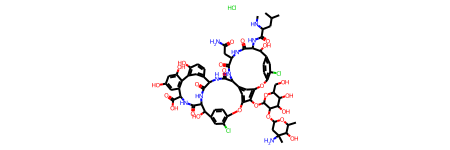

In [539]:
mol = Chem.MolFromSmiles(neg_salt.iloc[14]['smiles_fetched'])
# Chem.MolToInchiKey(mol)
mol

In [547]:
Chem.MolToSmiles(mol,doRandom=False,canonical=False)

'CC1C(O)C(C)(N)CC(OC2C(O)C(O)C(CO)OC2Oc2c3cc4cc2Oc2c(Cl)cc(cc2)C(O)C(NC(=O)C(CC(C)C)NC)C(=O)NC(CC(=O)N)C(=O)NC4C(=O)NC2c4cc(c(O)cc4)-c4c(cc(O)cc4O)C(C(=O)O)NC(=O)C(C(O)c4cc(Cl)c(cc4)O3)NC2=O)O1.Cl'

In [548]:
Chem.MolToSmiles(mol,doRandom=False,canonical=False)

'CC1C(O)C(C)(N)CC(OC2C(O)C(O)C(CO)OC2Oc2c3cc4cc2Oc2c(Cl)cc(cc2)C(O)C(NC(=O)C(CC(C)C)NC)C(=O)NC(CC(=O)N)C(=O)NC4C(=O)NC2c4cc(c(O)cc4)-c4c(cc(O)cc4O)C(C(=O)O)NC(=O)C(C(O)c4cc(Cl)c(cc4)O3)NC2=O)O1.Cl'

In [543]:
Chem.MolToSmiles(mol,doRandom=True,canonical=False)

'C1(CC(N)=O)NC(=O)C(NC(C(NC)CC(C)C)=O)C(c2ccc(c(c2)Cl)Oc2c(c3cc(c2)C(C(=O)NC2c4cc(-c5c(cc(O)cc5O)C(C(O)=O)NC(C(NC2=O)C(c2ccc(O3)c(c2)Cl)O)=O)c(cc4)O)NC1=O)OC1OC(C(C(O)C1OC1CC(C)(N)C(C(C)O1)O)O)CO)O.Cl'

In [545]:
Chem.MolToRandomSmilesVect(mol,1)

['C(C(CC(C)C)NC)(=O)NC1C(NC(CC(=O)N)C(NC2C(=O)NC3C(NC(C(NC(c4cc(O)cc(O)c4-c4c(ccc3c4)O)C(O)=O)=O)C(O)c3cc(c(Oc4c(OC5C(OC6OC(C(O)C(N)(C6)C)C)C(C(C(CO)O5)O)O)c(Oc5c(cc(cc5)C1O)Cl)cc2c4)cc3)Cl)=O)=O)=O.Cl']

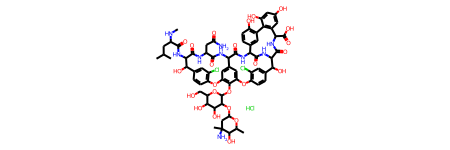

In [541]:
from rdkit.Chem import rdCoordGen
rdCoordGen.AddCoords(mol)
mol

In [518]:
Chem.MolToInchiKey(mol)

'HOKIDJSKDBPKTQ-UHFFFAOYSA-N'

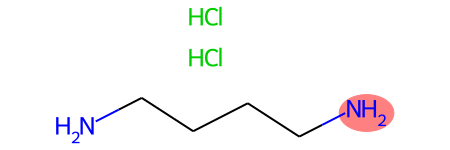

In [501]:
from rdkit.Chem.Draw import rdMolDraw2D
# mol = Chem.MolFromSmiles(neg_salt.iloc[1]['smiles_fetched'])
patt = Chem.MolFromSmarts('[NH2]')
hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
# d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
# rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,highlightBonds=hit_bonds)
mol

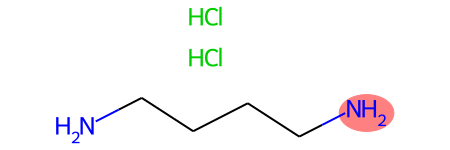

In [500]:
mol

In [406]:
std_list_fc0 = pd.DataFrame()
for index, row in std_list_neutrilized.iterrows():
    # looking for either naturally charged/neutralized molecule
    if row['uncharged_formal_charges']==0 or row['uncharged_formal_charges']==row['formal_charges']:
        std_list_fc0 = std_list_fc0.append(row)

In [407]:
uncharged_inchikey = []
for index, row in std_list_fc0.iterrows():
    if row['Formula_fetched']==row['uncharged_formulas']:
        uncharged_inchikey.append(row['inchikey'])
    else:
        uncharged_inchikey.append(Chem.MolToInchiKey(Chem.MolFromSmiles(row['uncharged_smiles'])))
    # break

In [408]:
std_list_fc0['uncharged_inchikey']=uncharged_inchikey

In [409]:
std_list_fc0.columns

Index(['Mix', 'Name', 'Formula_fetched', 'Formula', 'inchikey',
       'smiles_fetched', 'formal_charges', 'pos_salt_found', 'neg_salt_found',
       'stripped_smiles', 'stripped_formulas', 'stripped_formal_charges',
       'uncharged_smiles', 'uncharged_formulas', 'uncharged_formal_charges',
       'uncharged_inchikey'],
      dtype='object')

In [453]:
std_list_cleaned = {'mix':std_list_fc0['Mix'],
                    'name':std_list_fc0['Name'],
                    'formula':std_list_fc0['uncharged_formulas'],
                    'smiles':std_list_fc0['uncharged_smiles'],
                    'inchikey':std_list_fc0['uncharged_inchikey'],
                    'formal_charges':std_list_fc0['uncharged_formal_charges'],
                    'pos_salt_group':std_list_fc0['pos_salt_found'],
                    'neg_salt_group':std_list_fc0['pos_salt_found'],






                    }
std_list_cleaned= pd.DataFrame.from_dict(std_list_cleaned)
std_list_cleaned.reset_index(inplace=True, drop=True)

In [454]:
from toolsets.adduct_calculator import complete_adducts
std_list_adducts=complete_adducts(std_list_cleaned, adducts=['[M+H]+','[M+Na]+','[M+NH4]+','[M-H2O+H]+', '[M-H]-','[M+Cl]-','[M-H2O+H]+','[M+C2H4O2-H]-'])

In [455]:
string_search(std_list_adducts, 'formal_charges', 0)

,mix,name,formula,smiles,inchikey,formal_charges,pos_salt_group,neg_salt_group,[M+]+,[M+H]+,[M+Na]+,[M+NH4]+,[M-H2O+H]+,[M-H]-,[M+Cl]-,[M+C2H4O2-H]-
0,BEHC18_pos_R22_BA_UK_mix1,?-Muricholic acid,C24H40O5,CC(CCC(=O)O)C1CCC2C3C(O)C(O)C4CC(O)CCC4(C)C3CC...,DKPMWHFRUGMUKF-JDDNAIEOSA-N,0,0,0,0.0,409.2949,431.2768,426.3214,391.2843,407.2803,443.2570,467.3014
1,BEHC18_pos_R22_BA_UK_mix1,Glycolithocholic acid,C26H43NO4,CC(CCC(=O)NCC(=O)O)C1CCC2C3CCC4CC(O)CCC4(C)C3C...,XBSQTYHEGZTYJE-OETIFKLTSA-N,0,0,0,0.0,434.3265,456.3084,451.3530,416.3159,432.3119,468.2886,492.3331
2,BEHC18_pos_R22_BA_UK_mix1,Glycochenodeoxycholic acid,C26H43NO5,CC(CCC(=O)NCC(=O)O)C1CCC2C3C(O)CC4CC(O)CCC4(C)...,GHCZAUBVMUEKKP-GYPHWSFCSA-N,0,0,0,0.0,450.3214,472.3033,467.3479,432.3108,448.3068,484.2835,508.3280
3,BEHC18_pos_R22_BA_UK_mix1,Tauroursodeoxycholic acid,C26H45NO6S,CC(CCC(=O)NCCS(=O)(=O)O)C1CCC2C3C(O)CC4CC(O)CC...,BHTRKEVKTKCXOH-LBSADWJPSA-N,0,0,0,0.0,500.3040,522.2860,517.3306,482.2935,498.2895,534.2662,558.3106
4,BEHC18_pos_R22_BA_UK_mix1,Tauro-?-Muricholic acid,C26H45NO7S,CC(CCC(=O)NCCS(=O)(=O)O)C1CCC2C3C(O)C(O)C4CC(O...,XSOLDPYUICCHJX-SYCKBGHMSA-N,0,0,0,0.0,516.2990,538.2809,533.3255,498.2884,514.2844,550.2611,574.3055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,BEHC18_pos_R97_MX45_PFP_NP_PN_35,Isolaserpitin,C19H20O6,CC=C(C)C(=O)OC1C(O)c2c(ccc3ccc(=O)oc23)OC1(C)C,KJWFOHVSTFGWGZ-YHYXMXQVSA-N,0,0,0,0.0,345.1333,367.1152,362.1598,327.1227,343.1187,379.0954,403.1398
2022,BEHC18_pos_R97_MX45_PFP_NP_PN_35,Kojic acid,C6H6O4,O=c1cc(CO)occ1O,BEJNERDRQOWKJM-UHFFFAOYSA-N,0,0,0,0.0,143.0339,165.0158,160.0604,125.0233,141.0193,176.9960,201.0405
2023,BEHC18_pos_R97_MX45_PFP_NP_PN_35,MENTHOL(-),C10H20O,CC1CCC(C(C)C)C(O)C1,NOOLISFMXDJSKH-UHFFFAOYSA-N,0,0,0,0.0,157.1587,179.1406,174.1852,139.1481,155.1441,191.1208,215.1653
2024,BEHC18_pos_R97_MX45_PFP_NP_PN_35,"methyl 2-(9-hydroxy-1-methyl-5,10-dioxo-3,4-di...",C17H16O6,COC(=O)CC1CC2=C(C(=O)c3c(O)cccc3C2=O)C(C)O1,FMEUWIKCSICJBO-UHFFFAOYSA-N,0,0,0,0.0,317.1020,339.0839,334.1285,299.0914,315.0874,351.0641,375.1085


In [456]:
std_list_adducts.to_csv(os.path.join(source_dir, "std_list_sanitized_adducts.csv"), index = False)

# Check for missing MZML files

In [68]:
mzml_dir_pos_HCD = '/Volumes/Samsung_T5/20220713_TS_NP_HCD-UVPD_sequential/pos_HCD-MS2'
mzml_dir_pos_UVPD = '/Volumes/Samsung_T5/20220713_TS_NP_HCD-UVPD_sequential/pos_UVPD-MS2'
mzml_dir_neg_HCD = '/Volumes/Samsung_T5/20220713_TS_NP_HCD-UVPD_sequential/neg_HCD-MS2'
mzml_dir_neg_UVPD = '/Volumes/Samsung_T5/20220713_TS_NP_HCD-UVPD_sequential/neg_UVPD-MS2'

In [59]:
from toolsets.file_io import check_missing_files

In [83]:
goods, duplicates, missings = check_missing_files(std_list_neg['Mix'].unique(), '.mzML', mzml_dir_neg_UVPD)

In [ ]:
features_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/GT/features'
bad_files = []
missing_files = []
negative_files = []
for mix in (std_list['Mix'].unique()):
    for enzyme in tqdm(enzyme_list['List of enzymes'].unique()):
        filename =enzyme+"_"+"Mix"+"_"+str(mix)
        feature_path = os.path.join(feature_dir, filename+".csv")
        if os.path.exists(feature_path) ==True:
            try:
                features = read_in_alphapept(feature_path)
                if features['charge'].min()<0:
                    negative_files.append(filename)
            except:
                bad_files.append(filename)
                # print("the file is bad %s" %(filename) )
        else:
            missing_files.append(filename)
            # print("the file doesnt exist")